In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Passanger_booking_data.csv')

In [3]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,Australia,0,0,0,7.21,1
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49997,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49998,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49999,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
50000,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [4]:
df.isna().sum().sum()

0

In [5]:
df.drop(['sales_channel','trip_type','flight_day','route','booking_origin'],axis= 1,inplace=True)

In [6]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1,21,12,6,0,0,0,7.21,1
1,2,262,19,7,1,0,0,5.52,0
2,1,112,20,3,0,0,0,5.52,0
3,2,243,22,17,1,1,0,5.52,0
4,1,96,31,4,0,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...
49997,2,27,6,9,1,0,1,5.62,0
49998,1,111,6,4,0,0,0,5.62,0
49999,1,24,6,22,0,0,1,5.62,0
50000,1,15,6,11,1,0,1,5.62,0


In [7]:
new = {
    'num_passengers':0,
    'purchase_lead':1,
    'length_of_stay':2,
    'flight_hour':3,
    'wants_extra_baggage':4,
    'wants_preferred_seat':5,
    'wants_in_flight_meals':6,
    'flight_duration':7,
    'booking_complete':8
    
}

In [8]:
df.rename(columns=new, inplace=True)

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8
count,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000,50002.000000
mean,1.591256,84.940582,23.044778,9.066277,0.668773,0.296968,0.427143,7.277524,0.149574
std,1.020167,90.450548,33.887171,5.412569,0.470659,0.456927,0.494668,1.496854,0.356657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
col = [0, 1, 2, 3, 4, 5, 6, 7] 
df_sc = pd.DataFrame(sc.fit_transform(df[col]), columns=col)

In [14]:
df_sc.describe()

,0,1,2,3,4,5,6,7
count,5.000200e+04,5.000200e+04,5.000200e+04,5.000200e+04,5.000200e+04,5.000200e+04,5.000200e+04,5.000200e+04
mean,-3.637833e-17,-5.129913e-17,1.818917e-17,1.156717e-16,-9.961411e-17,1.524764e-16,-4.973600e-19,-8.594381e-16
std,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,-5.795739e-01,-9.390925e-01,-6.800511e-01,-1.675058e+00,-1.420943e+00,-6.499312e-01,-8.635022e-01,-1.742021e+00
25%,-5.795739e-01,-7.069191e-01,-5.325012e-01,-7.512732e-01,-1.420943e+00,-6.499312e-01,-8.635022e-01,-1.107350e+00
50%,-5.795739e-01,-3.752429e-01,-1.783813e-01,-1.224520e-02,7.037579e-01,-6.499312e-01,-8.635022e-01,1.953956e-01
75%,4.006674e-01,3.323332e-01,1.462285e-01,7.267828e-01,7.037579e-01,1.538624e+00,1.158075e+00,1.037170e+00
max,7.262356e+00,8.646352e+00,2.227872e+01,2.574353e+00,7.037579e-01,1.538624e+00,1.158075e+00,1.484780e+00


In [15]:
df_sc.shape

(50002, 8)

In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

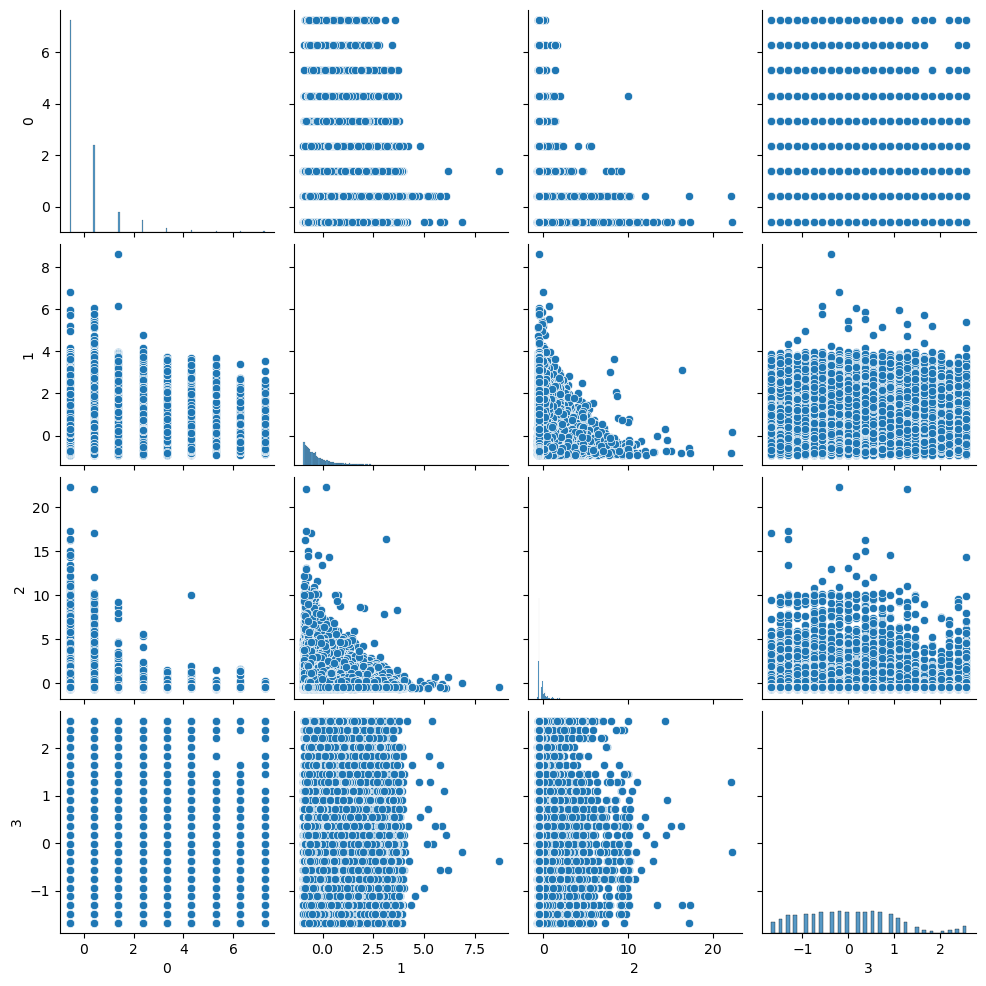

In [19]:
sns.pairplot(df_sc[[0,1,2,3]])

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(df_sc, df[8], test_size=0.3)
print(xtrain.shape, xtest.shape)

(35001, 8) (15001, 8)


In [21]:
from sklearn.linear_model import Perceptron
p=Perceptron()
p.fit(xtrain,ytrain)

Perceptron()

In [22]:
prediction=p.predict(xtest)

In [23]:
from sklearn.metrics import accuracy_score
print("Testing accuracy is ",accuracy_score(ytest,prediction))

Testing accuracy is  0.810079328044797


In [24]:
pred_train=p.predict(xtrain)
print("Training accuracy is: ",accuracy_score(ytrain,pred_train))

Training accuracy is:  0.8105768406616953


In [27]:
y_pred = p.predict(xtest)

accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.810079328044797
